# shAI Training 2023 | Level 1
## Task #9  (End-to-End ML Project Team)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns


In [3]:
testdata=pd.read_csv('dataset/test.csv')

dataset=pd.read_csv('dataset/train.csv')

In [4]:
dataset.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [5]:
testdata.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [6]:
print(dataset.columns)
print(testdata.columns)

Index(['Id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'x', 'y', 'z'],
      dtype='object')
Index(['Id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z'],
      dtype='object')


In [7]:
dataset.drop(['Id'],axis=1,inplace=True)
Id=testdata['Id']
testdata.drop(['Id'],axis=1,inplace=True)


In [8]:
dataset.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [9]:
dataset.shape
# we have 10 row and col 43152

(43152, 10)

In [10]:
dataset.index
# number of dataset

RangeIndex(start=0, stop=43152, step=1)

In [11]:
dataset.info()
# no null data and we have dtypes float 6 , integer 1 ,and object 3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  object 
 2   color    43152 non-null  object 
 3   clarity  43152 non-null  object 
 4   depth    43152 non-null  float64
 5   table    43152 non-null  float64
 6   price    43152 non-null  int64  
 7   x        43152 non-null  float64
 8   y        43152 non-null  float64
 9   z        43152 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


In [12]:
cutquality = dataset.value_counts("cut")
cutquality

cut
Ideal        17203
Premium      11113
Very Good     9658
Good          3881
Fair          1297
Name: count, dtype: int64

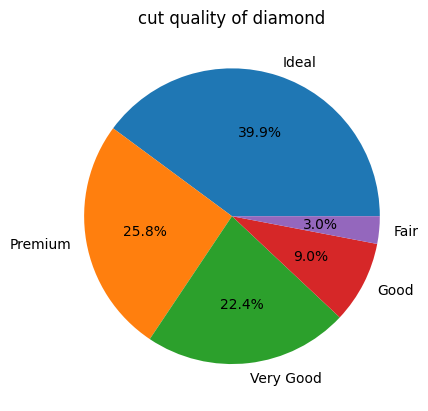

In [13]:
cutquality = dataset.value_counts("cut")
label = cutquality.index
index_array = label.to_numpy()
cutscount=[]
for cutcount in cutquality :
    cutscount.append(cutcount)
plt.pie(cutscount, labels=index_array ,autopct='%1.1f%%')
plt.title('cut quality of diamond')
plt.show()

In [14]:
colorlist = dataset.value_counts("color")
colorlist

color
G    9060
E    7832
F    7633
H    6651
D    5421
I    4265
J    2290
Name: count, dtype: int64

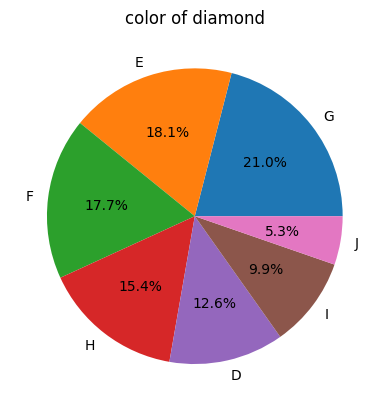

In [15]:
label = colorlist.index
index_array = label.to_numpy()
colorscount=[]
for colorcount in colorlist :
    colorscount.append(colorcount)
plt.pie(colorscount, labels=index_array ,autopct='%1.1f%%')
plt.title('color of diamond')
plt.show()

In [16]:
clarity=dataset.value_counts("clarity")
clarity

clarity
SI1     10428
VS2      9824
SI2      7432
VS1      6475
VVS2     4041
VVS1     2904
IF       1442
I1        606
Name: count, dtype: int64

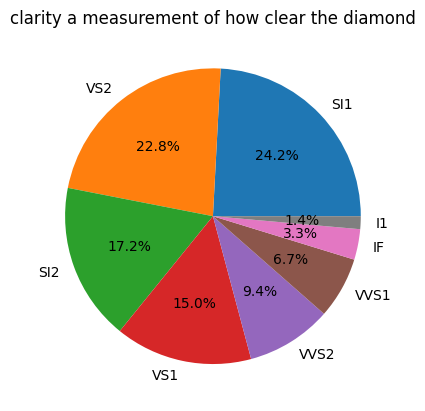

In [17]:
label = clarity.index
index_array = label.to_numpy()
claritylist=[]
for count in clarity :
    claritylist.append(count)
plt.pie(claritylist, labels=index_array ,autopct='%1.1f%%')
plt.title('clarity a measurement of how clear the diamond')
plt.show()

In [18]:
dataset.describe()

,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [19]:
subdata = dataset.copy()

# subdata = dataset.drop(dataset[dataset["x"] != 0].index)
# subdata = dataset.drop(dataset[dataset["y"] != 0].index)
subdata = dataset.drop(dataset[dataset["z"] != 0].index)
subdata


,carat,cut,color,clarity,depth,table,price,x,y,z
571,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
903,2.25,Premium,I,SI1,61.3,58.0,15397,8.52,8.42,0.0
1221,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
4980,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
6765,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.0
11221,2.80,Good,G,SI2,63.8,58.0,18788,8.90,8.85,0.0
13727,2.02,Premium,H,VS2,62.7,53.0,18207,8.02,7.95,0.0
14265,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
16971,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
21061,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0


In [20]:
dataset = dataset.drop(dataset[dataset["x"]==0].index)
dataset = dataset.drop(dataset[dataset["y"]==0].index)
dataset = dataset.drop(dataset[dataset["z"]==0].index)
dataset.describe()
# delete missing data

,carat,depth,table,price,x,y,z
count,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000
mean,0.797578,61.747386,57.457925,3927.668691,5.731757,5.735070,3.539962
std,0.473325,1.435091,2.233401,3983.324154,1.119336,1.147272,0.704884
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,947.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2400.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5311.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [21]:
dataset.shape

(43135, 10)

<Axes: ylabel='Frequency'>

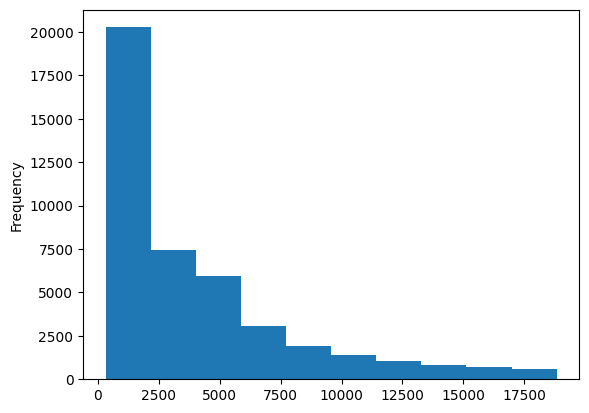

In [22]:
dataset['price'].plot.hist()

<Axes: xlabel='cut', ylabel='price'>

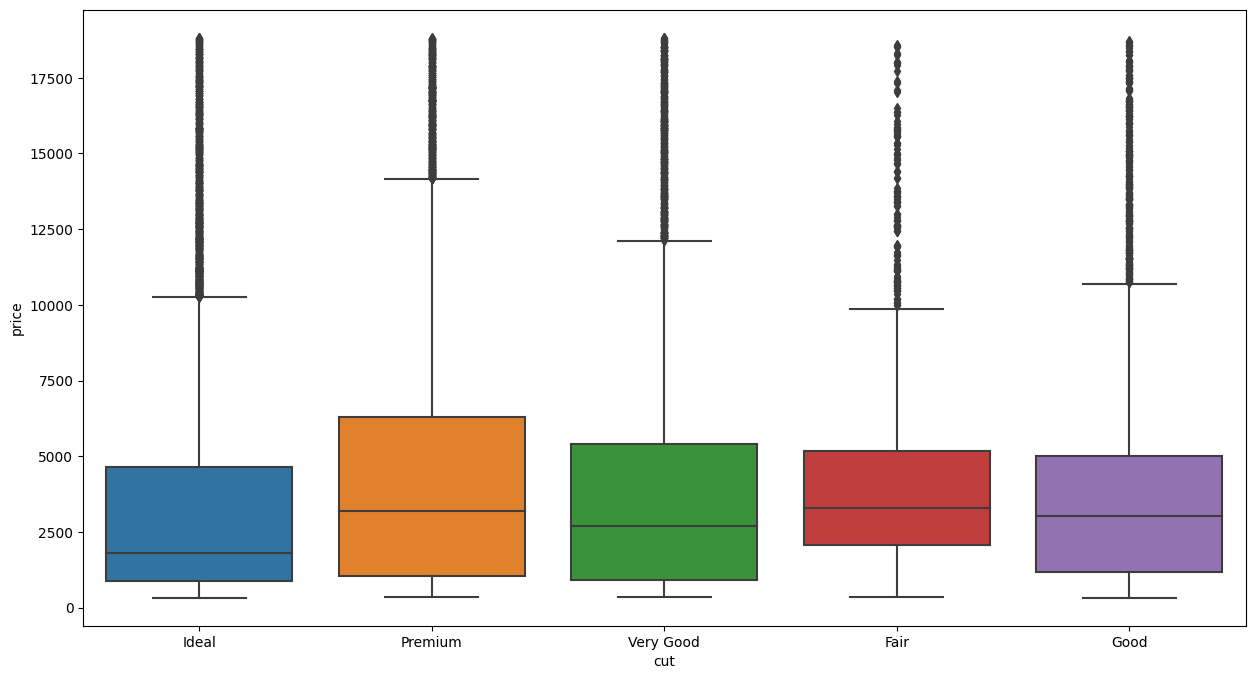

In [23]:
plt.figure(figsize=(15,8))
sns.boxplot(y="price",x='cut', data=dataset)

<Axes: xlabel='color', ylabel='price'>

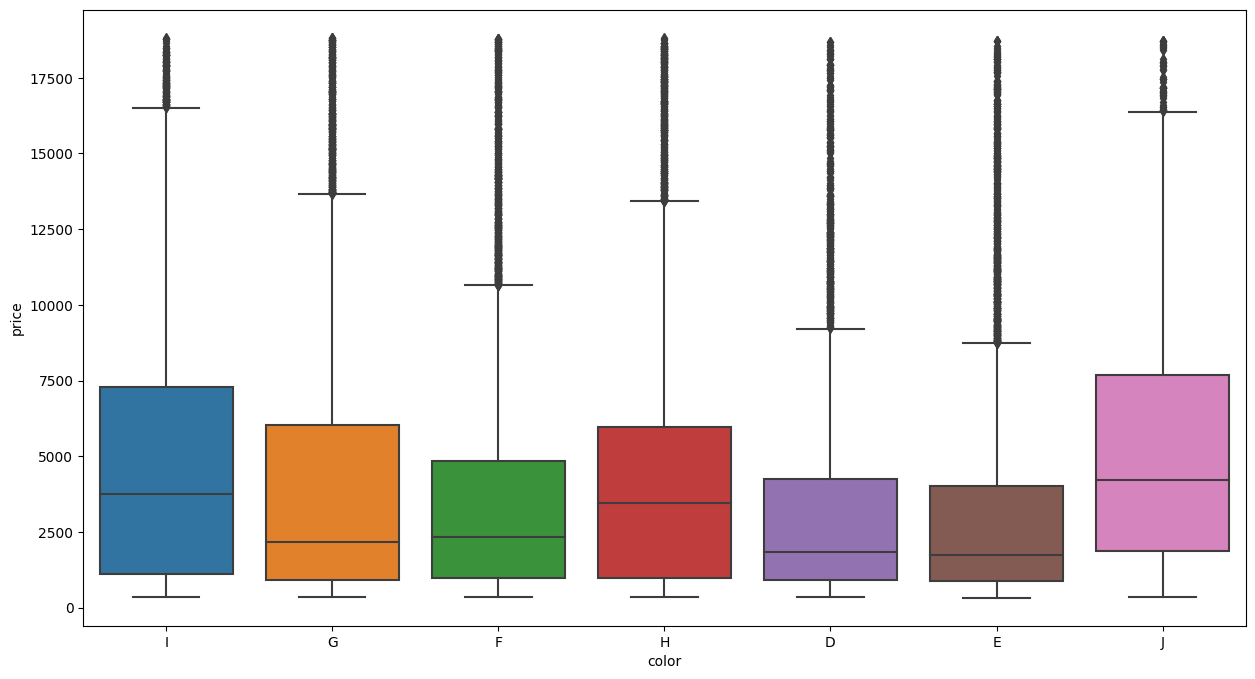

In [24]:
plt.figure(figsize=(15,8))
sns.boxplot(y="price",x='color', data=dataset)

<Axes: xlabel='clarity', ylabel='price'>

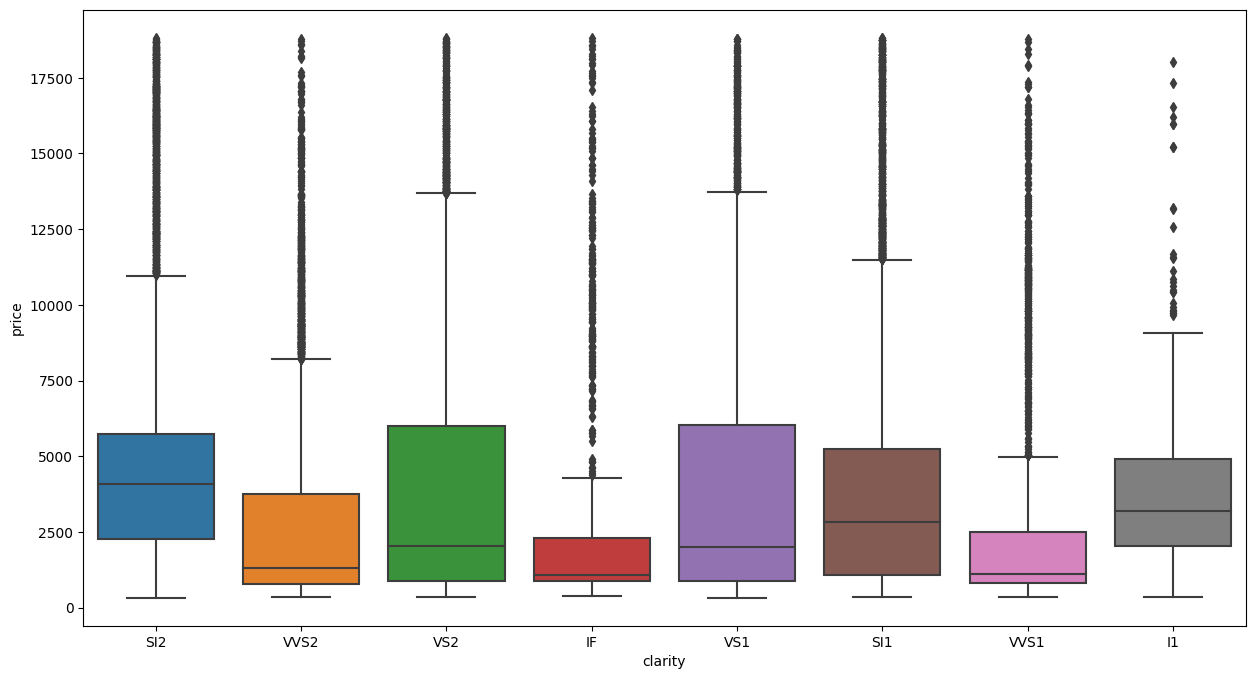

In [25]:
plt.figure(figsize=(15,8))
sns.boxplot(y="price",x='clarity', data=dataset)

<Axes: xlabel='color', ylabel='price'>

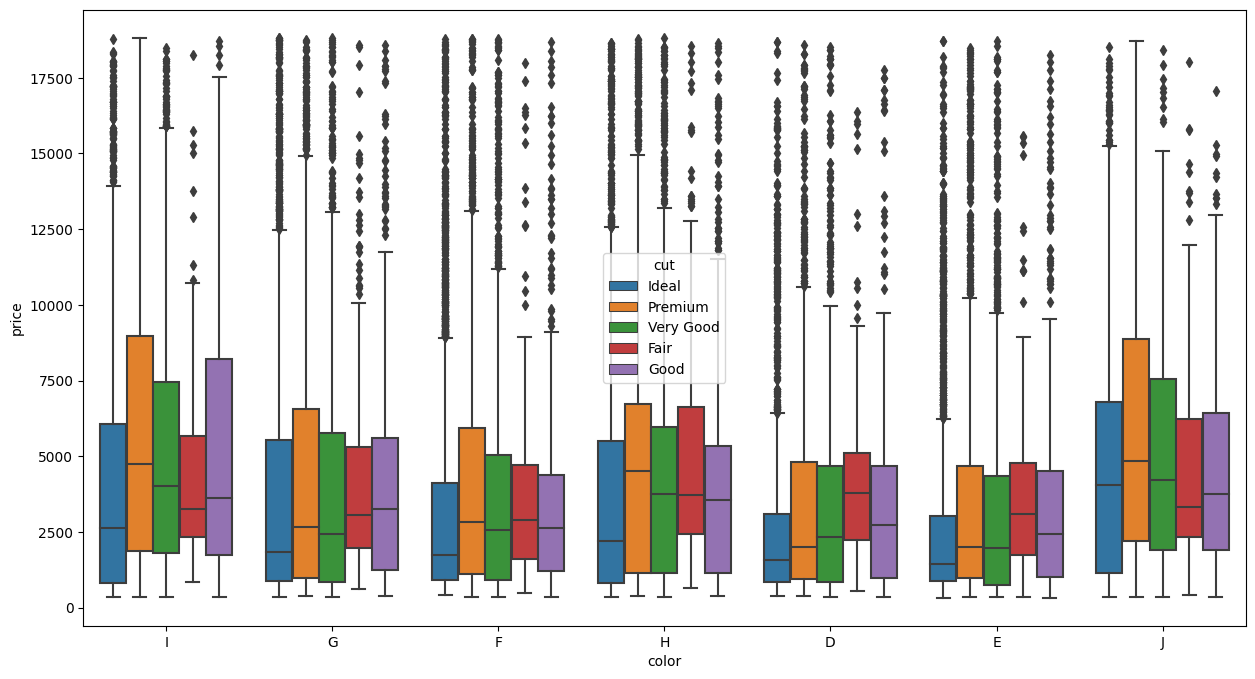

In [26]:
plt.figure(figsize=(15,8))
sns.boxplot(x="color", y="price" ,hue = "cut", data=dataset)

<Axes: xlabel='clarity', ylabel='price'>

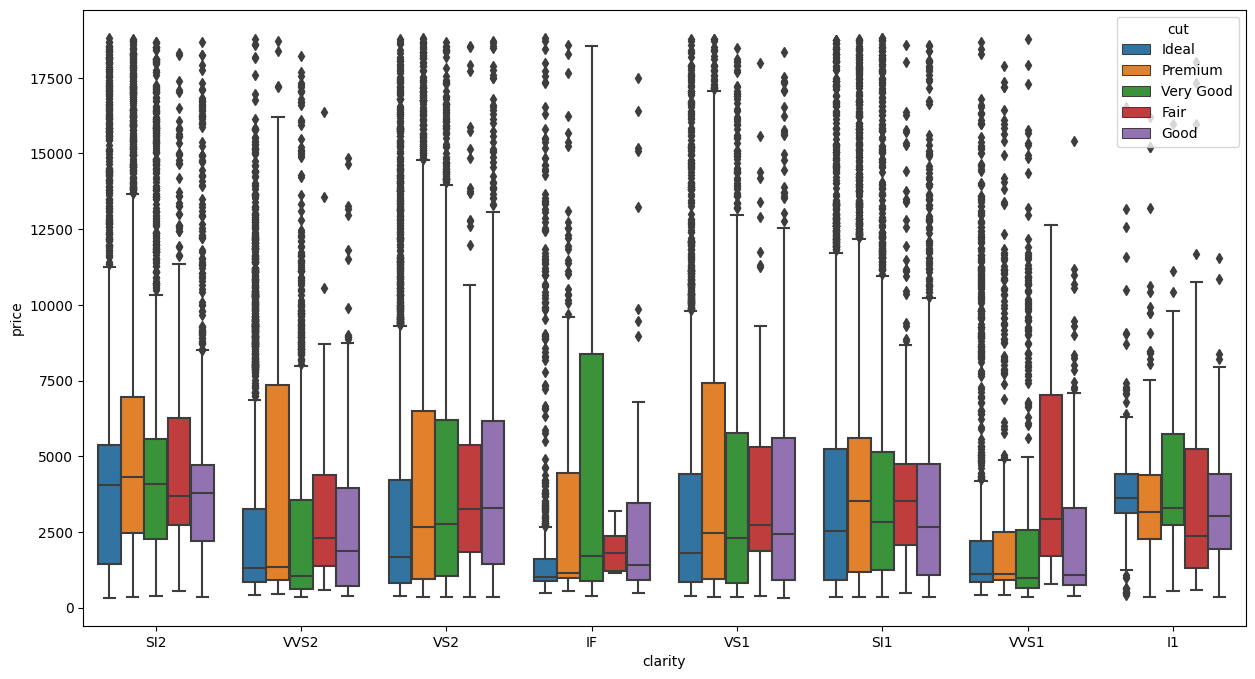

In [27]:
plt.figure(figsize=(15,8))
sns.boxplot(x="clarity", y="price" ,hue = "cut", data=dataset)

<Axes: xlabel='price', ylabel='x'>

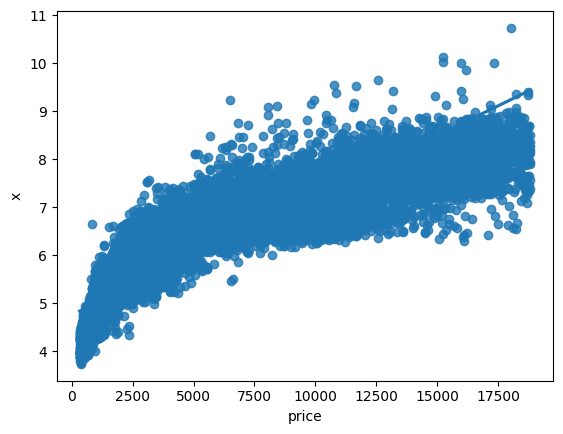

In [28]:
sns.regplot(x="price", y="x", data=dataset, fit_reg=True)

<Axes: xlabel='price', ylabel='y'>

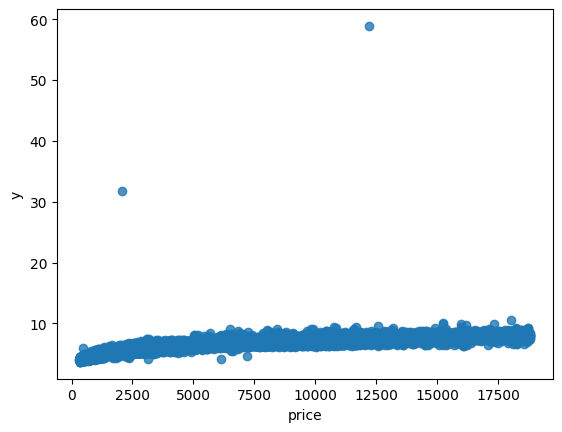

In [29]:
sns.regplot(x="price", y="y", data=dataset, fit_reg=True)

<Axes: xlabel='price', ylabel='z'>

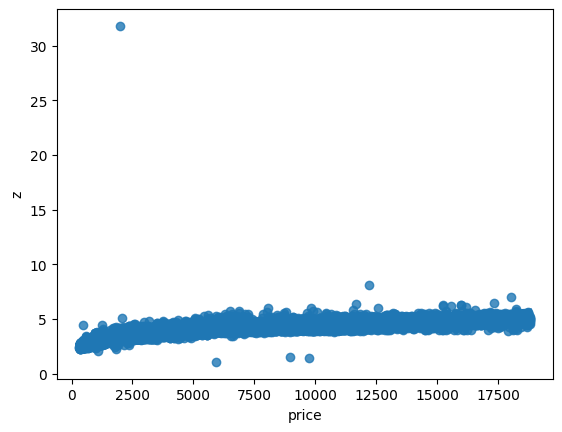

In [30]:
sns.regplot(x="price", y="z", data=dataset, fit_reg=True)

<Axes: xlabel='price', ylabel='depth'>

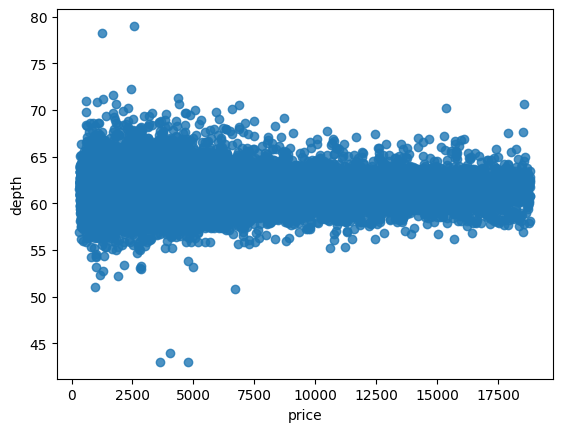

In [31]:
sns.regplot(x="price", y="depth", data=dataset, fit_reg=True)

<Axes: xlabel='price', ylabel='table'>

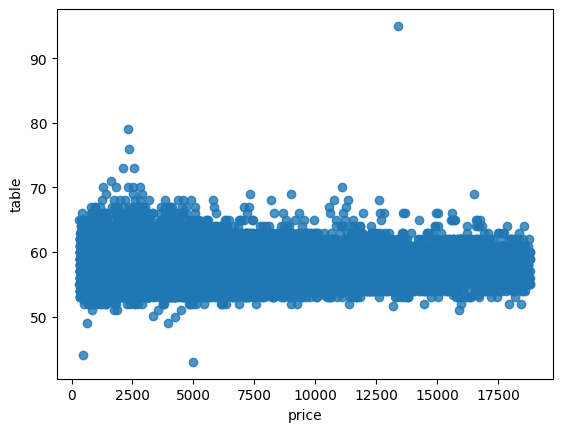

In [32]:
sns.regplot(x="price", y="table", data=dataset, fit_reg=True)

In [33]:
dataset = dataset[(dataset["depth"] < 75) & (dataset["depth"] > 45)]
dataset = dataset[(dataset["table"] < 80) & (dataset["table"] > 40)]
dataset = dataset[(dataset["x"] < 30)]
dataset = dataset[(dataset["y"] < 30)]
dataset = dataset[(dataset["z"] < 30) & (dataset["z"] > 2)]
dataset.shape
# delete out layers data

(43123, 10)

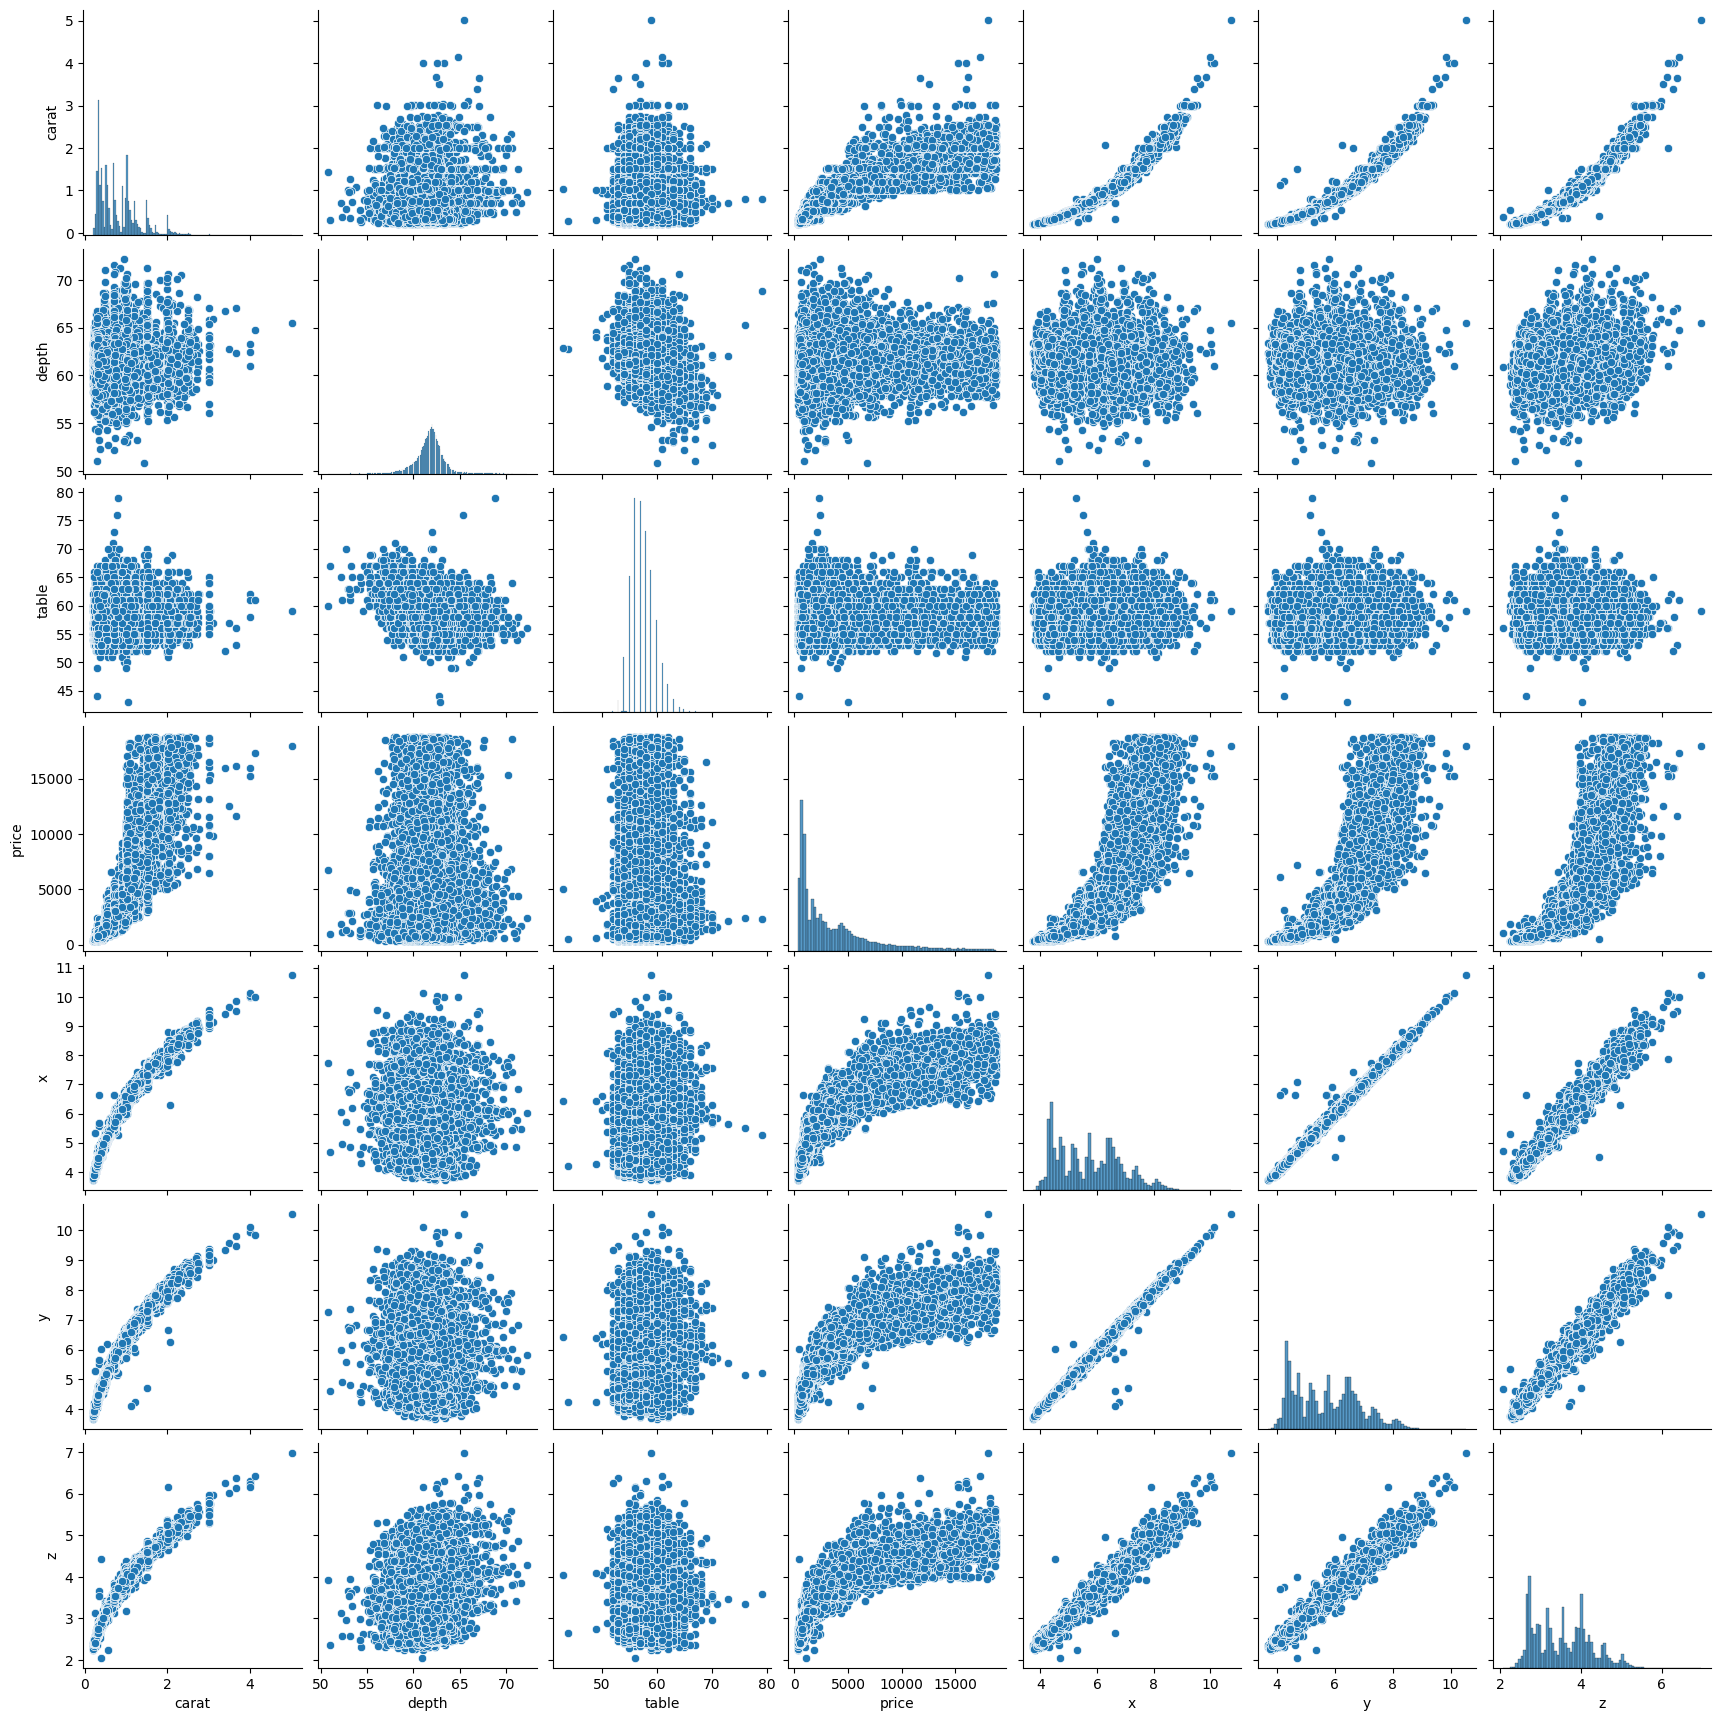

In [34]:
sns.pairplot(dataset)

<Axes: xlabel='cut', ylabel='price'>

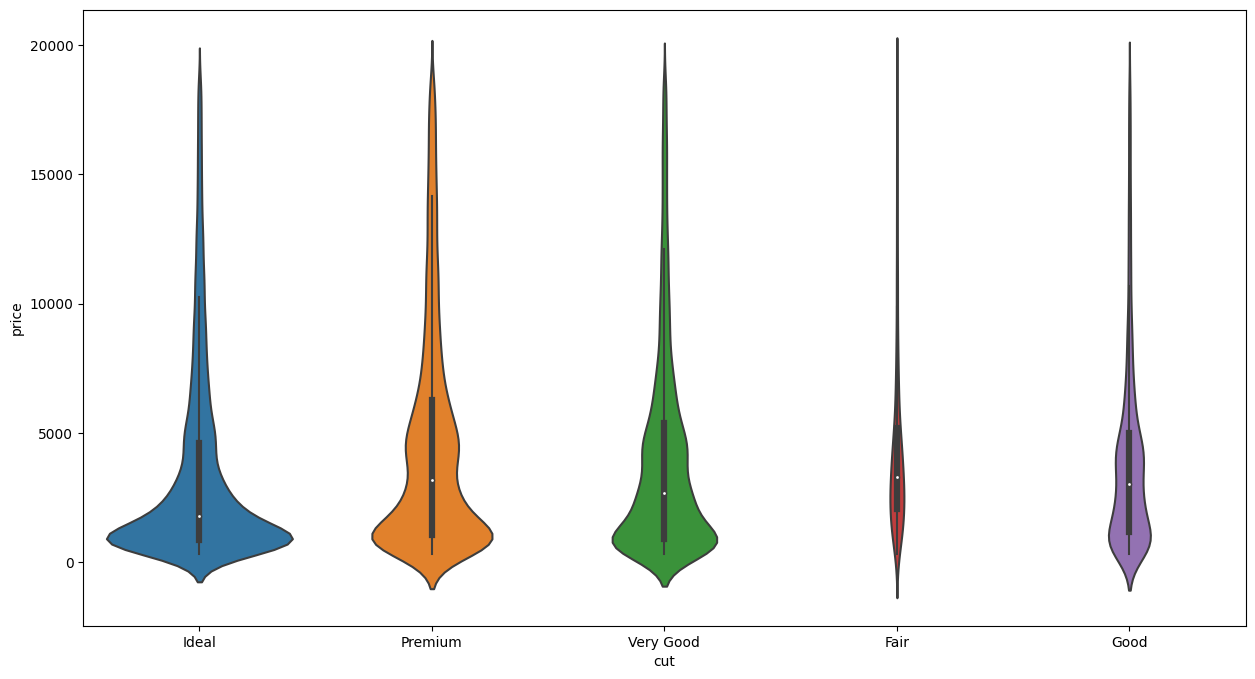

In [35]:
plt.figure(figsize=(15,8))
sns.violinplot(x="cut",y="price", data=dataset,scale= "count")

<Axes: xlabel='color', ylabel='price'>

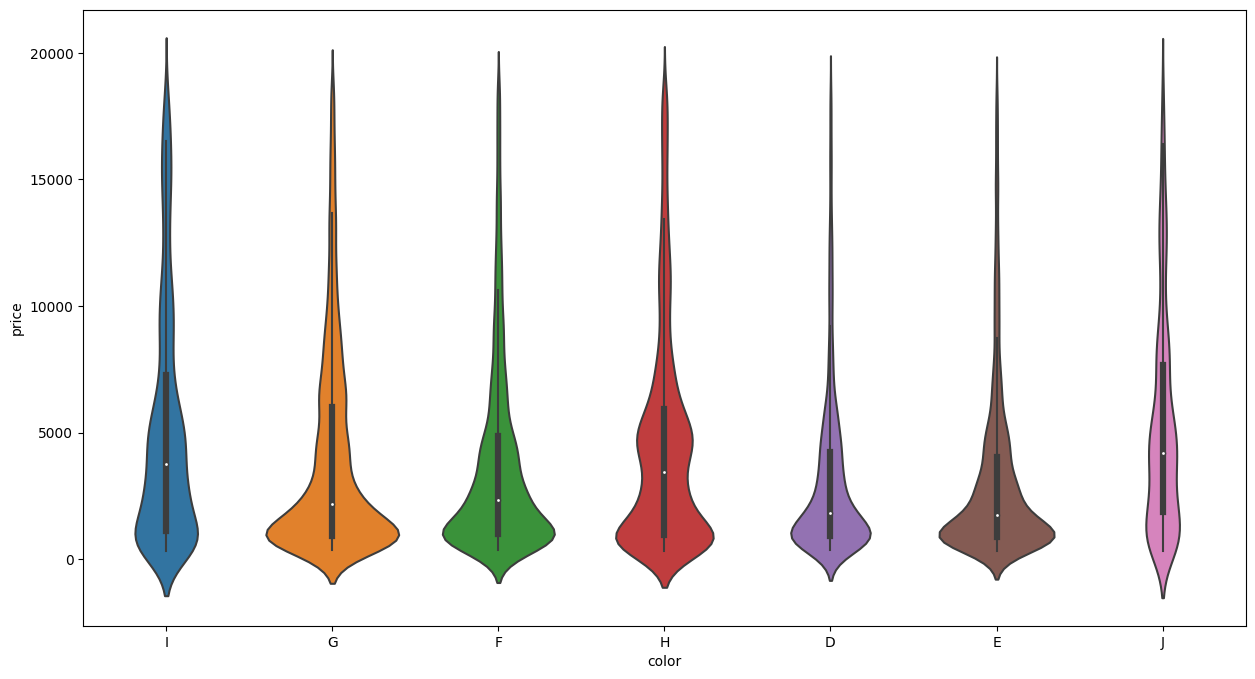

In [36]:
plt.figure(figsize=(15,8))
sns.violinplot(x="color",y="price", data=dataset,scale= "count")

<Axes: xlabel='clarity', ylabel='price'>

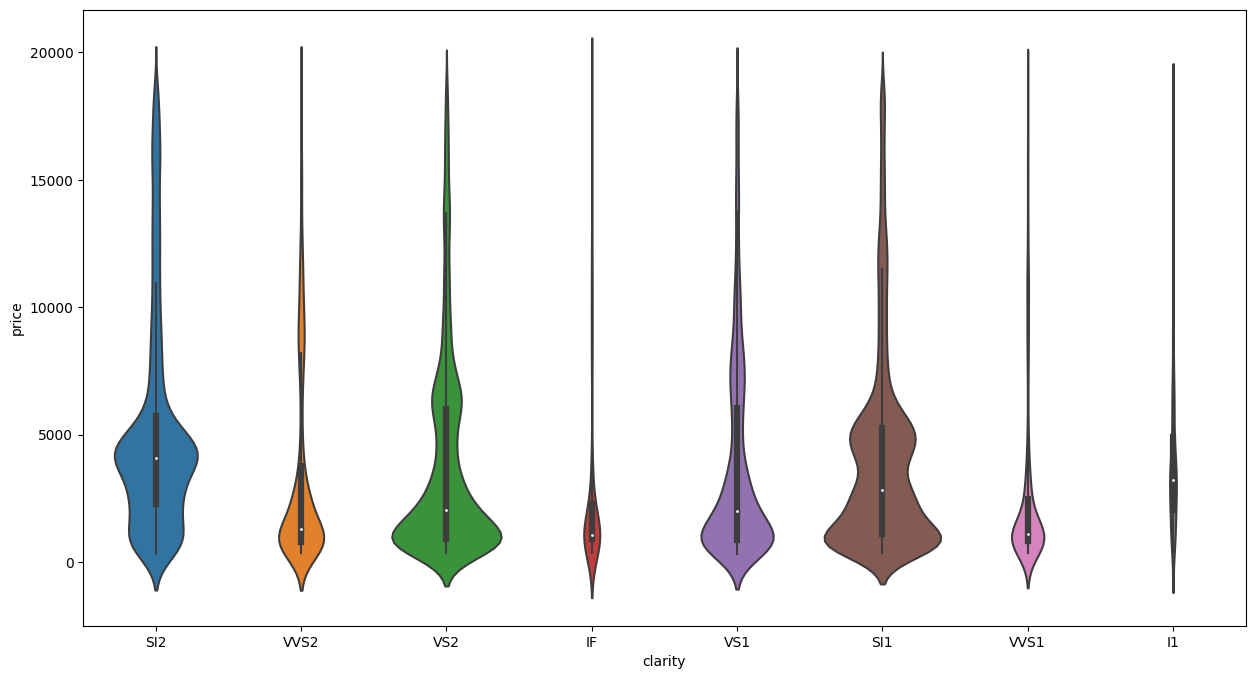

In [37]:
plt.figure(figsize=(15,8))
sns.violinplot(x="clarity",y="price", data=dataset,scale= "count")

In [38]:
dataset.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [39]:
testdata.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [40]:
def cut_quality(argument):
    match argument:
        case "Ideal":
            return 5
        case "Premium":
            return 4
        case "Very Good":
            return 3
        case "Good":
            return 2
        case default:
            return 1


def color_grade(argument):
    match argument:
        case "D":
            return 6       
        case "E":
            return 5
        case "F":
            return 4
        case "G":
            return 3
        case "H":
            return 2
        case default:
            return 1


def clarity_grade(argument):
    match argument:
        case "IF":
            return 8
        case "VVS1":
            return 7
        case "VVS2":
            return 6
        case "VS1":
            return 5
        case "VS2":
            return 4
        case "SI1":
            return 3
        case "SI2":
            return 2
        case default:
            return 1

In [41]:
label_data = dataset.copy()
label_data['cut'] = label_data["cut"].apply(cut_quality)
label_data['color'] = label_data["color"].apply(color_grade)
label_data['clarity'] = label_data["clarity"].apply(clarity_grade)
label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.06,5,1,2,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,4,3,6,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,5,4,4,61.3,56.0,828,4.43,4.41,2.71
3,0.53,5,3,4,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,4,2,6,61.0,57.0,2596,5.76,5.72,3.50


<Axes: >

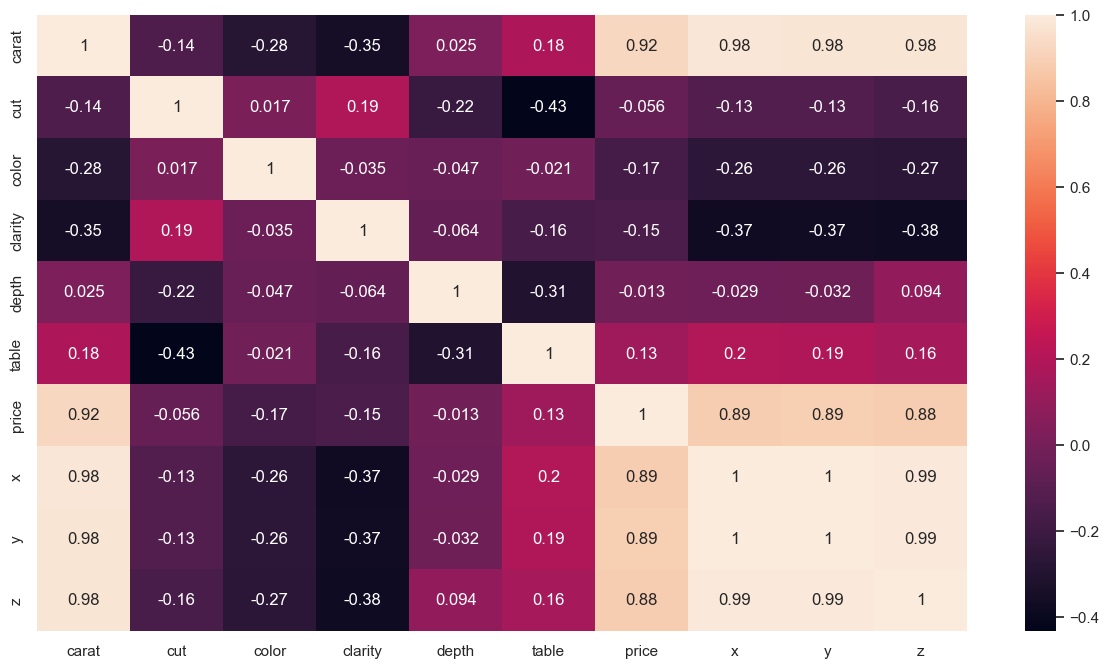

In [42]:
corr = label_data.corr()
sns.set(style='darkgrid')
%matplotlib inline
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

In [43]:
corr["price"].sort_values(ascending=False)

price      1.000000
carat      0.921868
y          0.888862
x          0.887148
z          0.882801
table      0.128278
depth     -0.012773
cut       -0.056359
clarity   -0.147350
color     -0.170433
Name: price, dtype: float64

In [44]:
print(dataset["color"].unique())
print(dataset["cut"].unique())
print(dataset["clarity"].unique())

['I' 'G' 'F' 'H' 'D' 'E' 'J']
['Ideal' 'Premium' 'Very Good' 'Fair' 'Good']
['SI2' 'VVS2' 'VS2' 'IF' 'VS1' 'SI1' 'VVS1' 'I1']


In [45]:
testdata
label_test_data = testdata.copy()
label_test_data['cut'] = label_test_data["cut"].apply(cut_quality)
label_test_data['color'] = label_test_data["color"].apply(color_grade)
label_test_data['clarity'] = label_test_data["clarity"].apply(clarity_grade)
label_test_data.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.34,5,3,6,61.1,57.0,4.52,4.48,2.75
1,0.71,4,5,4,62.7,58.0,5.74,5.68,3.58
2,0.44,3,1,5,62.8,56.0,4.83,4.88,3.05
3,0.81,4,5,2,60.1,59.0,6.09,6.03,3.65
4,0.40,5,3,7,61.2,56.0,4.74,4.80,2.92


In [46]:
# label_data['Vol']=label_data['z']*label_data['y']*label_data['x']
# label_data.drop(['y'], axis=1, inplace=True)
# label_data.drop(['x'], axis=1, inplace=True)
# label_data.drop(['z'], axis=1, inplace=True)
# label_data


In [47]:
# label_test_data['Vol'] = label_test_data['z'] * label_test_data['y']*label_test_data['x']
# label_test_data.drop(['y'], axis=1, inplace=True)
# label_test_data.drop(['x'], axis=1, inplace=True)
# label_test_data.drop(['z'], axis=1, inplace=True)
# label_test_data


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import joblib

lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor()
forest_reg = RandomForestRegressor()

X = label_data.drop(["price"], axis=1)
y = label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(label_test_data.shape)

(34498, 9)
(8625, 9)
(34498,)
(8625,)
(10788, 9)


In [49]:
tree_reg.fit(X_train, y_train)
print("Decision Tree Regressor train accuracy score is :",tree_reg.score(X_train, y_train))

predictions = tree_reg.predict(X_test)
predictions_test = tree_reg.predict(label_test_data)
print("Decision Tree Regressor test accuracy score is :", tree_reg.score(X_test, y_test))

testdata['price'] = predictions_test
# testdata.to_csv('testDecisionTreeRegressor.csv', index=False)
testdata

Decision Tree Regressor train accuracy score is : 0.9999959212039683
Decision Tree Regressor test accuracy score is : 0.9603934378745176


,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75,845.0
1,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58,2823.0
2,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05,694.0
3,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65,2939.0
4,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92,1374.0
...,...,...,...,...,...,...,...,...,...,...
10783,0.57,Ideal,H,VS1,60.9,56.0,5.34,5.36,3.26,1715.0
10784,1.05,Ideal,G,VS2,60.8,57.0,6.65,6.58,4.02,6322.0
10785,0.71,Ideal,E,VVS1,62.3,55.0,5.68,5.72,3.55,3831.0
10786,1.11,Premium,E,SI2,61.0,60.0,6.68,6.66,4.07,5233.0


In [50]:
print("R2_Score is: ", r2_score(y_test, predictions).round(4))
print("Root_mean_squared_error is: ", np.sqrt(mean_squared_error(y_test, predictions)))
print("mean_absolute_error is: ", mean_absolute_error(y_test, predictions).round(4))

R2_Score is:  0.9604
Root_mean_squared_error is:  787.5132395482428
mean_absolute_error is:  382.6562


In [51]:
# save decision_tree_regressor_model
joblib.dump(tree_reg, "decision_tree_regressor_model.joblib")
joblib.load("decision_tree_regressor_model.joblib")

DecisionTreeRegressor()

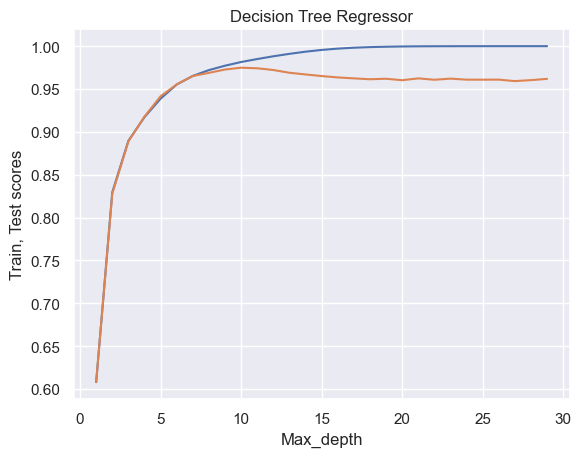

In [52]:
depths = [i for i in range(1, 30)]
train_score = []
test_score = []

for i in depths:
    DTR = DecisionTreeRegressor(max_depth=i)
    DTR.fit(X_train, y_train)
    train_score.append(DTR.score(X_train, y_train))
    test_score.append(DTR.score(X_test, y_test))

plt.plot(depths, train_score, label="Training")
plt.plot(depths, test_score, label="Testing")
plt.xlabel("Max_depth")
plt.ylabel("Train, Test scores")
plt.title("Decision Tree Regressor")
plt.show()

In [53]:
lin_reg.fit(X_train, y_train)
print("Linear Regression train accuracy score is :", lin_reg.score(X_train, y_train))

predictions = lin_reg.predict(X_test)
predictions_test = lin_reg.predict(label_test_data)
print("Linear Regression test accuracy score is :", lin_reg.score(X_test, y_test))

testdata['price'] = predictions_test
# testdata.to_csv('testLinearRegression.csv', index=False)

testdata

Linear Regression train accuracy score is : 0.9077283455083227
Linear Regression test accuracy score is : 0.9073246215082205


,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75,962.426402
1,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58,3275.108496
2,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05,484.851746
3,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65,3186.697079
4,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92,2081.788424
...,...,...,...,...,...,...,...,...,...,...
10783,0.57,Ideal,H,VS1,60.9,56.0,5.34,5.36,3.26,2018.940901
10784,1.05,Ideal,G,VS2,60.8,57.0,6.65,6.58,4.02,5791.520308
10785,0.71,Ideal,E,VVS1,62.3,55.0,5.68,5.72,3.55,5187.534410
10786,1.11,Premium,E,SI2,61.0,60.0,6.68,6.66,4.07,5946.205857


In [54]:
print("R2_Score is: ", r2_score(y_test, predictions).round(4))
print("Root_mean_squared_error is: ", np.sqrt(mean_squared_error(y_test, predictions)))
print("mean_absolute_error is: ", mean_absolute_error(y_test, predictions).round(4))

R2_Score is:  0.9073
Root_mean_squared_error is:  1204.6377662960592
mean_absolute_error is:  793.8881


In [55]:
# save linear_regression_model
joblib.dump(lin_reg, "linear_regression_model.joblib")
joblib.load("linear_regression_model.joblib")

LinearRegression()

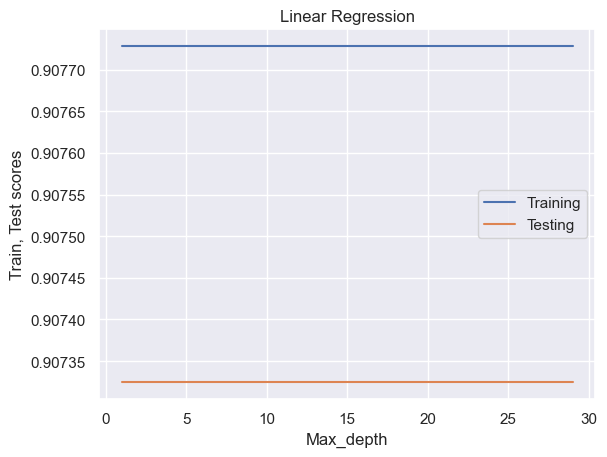

In [56]:
depths = [i for i in range(1, 30)]

train_score = []
test_score = []

for i in depths:
    lin_reg = LinearRegression()

    lin_reg.fit(X_train, y_train)

    train_score.append(lin_reg.score(X_train, y_train))
    test_score.append(lin_reg.score(X_test, y_test))

plt.plot(depths, train_score, label="Training")
plt.plot(depths, test_score, label="Testing")
plt.xlabel("Max_depth")
plt.ylabel("Train, Test scores")
plt.title("Linear Regression")
plt.legend()
plt.show()

In [57]:
forest_reg.fit(X_train, y_train)

print("Random Forest Regressor train accuracy score is:", forest_reg.score(X_train, y_train))

predictions = forest_reg.predict(X_test)
predictions_test = forest_reg.predict(label_test_data)

print("Random Forest Regressor test accuracy score is:", forest_reg.score(X_test, y_test))

testdata['price'] = predictions_test
# testdata.to_csv('testRandomForestRegressor.csv', index=False)

testdata

Random Forest Regressor train accuracy score is: 0.9970137130022165
Random Forest Regressor test accuracy score is: 0.9796502500143593


,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75,886.05
1,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58,2855.14
2,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05,727.07
3,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65,2894.02
4,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92,1115.79
...,...,...,...,...,...,...,...,...,...,...
10783,0.57,Ideal,H,VS1,60.9,56.0,5.34,5.36,3.26,1838.45
10784,1.05,Ideal,G,VS2,60.8,57.0,6.65,6.58,4.02,6565.28
10785,0.71,Ideal,E,VVS1,62.3,55.0,5.68,5.72,3.55,4174.34
10786,1.11,Premium,E,SI2,61.0,60.0,6.68,6.66,4.07,4999.35


In [58]:
# seave random_forest_model
joblib.dump(forest_reg, "random_forest_model.joblib")
joblib.load("random_forest_model.joblib")

RandomForestRegressor()

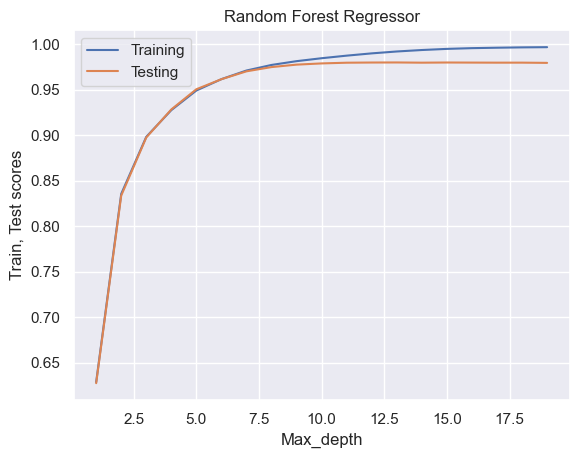

In [59]:
depths = [i for i in range(1, 20)]

train_score = []
test_score = []

for i in depths:
    forest_reg = RandomForestRegressor(max_depth=i)
    forest_reg.fit(X_train, y_train)
    train_score.append(forest_reg.score(X_train, y_train))
    test_score.append(forest_reg.score(X_test, y_test))

plt.plot(depths, train_score, label="Training")
plt.plot(depths, test_score, label="Testing")
plt.xlabel("Max_depth")
plt.ylabel("Train, Test scores")
plt.title("Random Forest Regressor")
plt.legend()
plt.show()

In [60]:
print("R2_Score is: ", r2_score(y_test, predictions).round(4))
print("Root_mean_squared_error is: ", np.sqrt(mean_squared_error(y_test, predictions)))
print("mean_absolute_error is: ", mean_absolute_error(y_test, predictions).round(4))

R2_Score is:  0.9797
Root_mean_squared_error is:  564.4868499875812
mean_absolute_error is:  284.4212


In [61]:
testdata={'Id': Id, 'price':predictions_test }
sub = pd.DataFrame(data=testdata)


In [62]:
# sub.to_csv('sub.csv',index=False)

In [63]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Splitting the dataset into training, validation, and test sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(
    X_val, y_val, test_size=0.5, random_state=42)

# Define the hyperparameter grid for Randomized Search
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10]
}

# Perform Randomized Search with cross-validation
model = RandomForestRegressor(random_state=42)
randomized_search = RandomizedSearchCV(
    model, param_distributions=param_grid, cv=5, scoring="neg_mean_squared_error", n_iter=10, random_state=42)
randomized_search.fit(X_train, y_train)

# Get the best model from Randomized Search
best_model = randomized_search.best_estimator_

# Evaluate the best model on the validation set
y_val_pred = best_model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print("Validation RMSE:", np.sqrt(mse_val))
print("Validation MAE:", mae_val)
print("Validation R^2 Score:", r2_val)

# Evaluate the best model on the test set
y_test_pred = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Test RMSE:", np.sqrt(mse_test))
print("Test MAE:", mae_test)
print("Test R^2 Score:", r2_test)

# Save the best model
joblib.dump(best_model, "best_models.joblib")


Validation RMSE: 574.0230296085249
Validation MAE: 292.6609752404235
Validation R^2 Score: 0.9792280412987088
Test RMSE: 548.4176433041273
Test MAE: 273.7841563488218
Test R^2 Score: 0.9805353744626305


['best_models.joblib']

In [64]:
# DecisionTreeRegressor

# Splitting the dataset into training, validation, and test sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(
    X_val, y_val, test_size=0.5, random_state=42)

# Define the hyperparameter grid for Randomized Search
param_grid = {
    "max_depth": [None, 5, 10, 20, 50],
    "min_samples_split": [2, 5, 10, 20]
}

# Perform Randomized Search with cross-validation
model = DecisionTreeRegressor(random_state=42)
randomized_search = RandomizedSearchCV(
    model, param_distributions=param_grid, cv=5, scoring="neg_mean_squared_error", n_iter=10, random_state=42)
randomized_search.fit(X_train, y_train)

# Get the best model from Randomized Search
best_modelDT = randomized_search.best_estimator_

# Evaluate the best model on the validation set
y_val_pred = best_modelDT.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print("Validation RMSE:", np.sqrt(mse_val))
print("Validation MAE:", mae_val)
print("Validation R^2 Score:", r2_val)

# Evaluate the best model on the test set
y_test_pred = best_modelDT.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Test RMSE:", np.sqrt(mse_test))
print("Test MAE:", mae_test)
print("Test R^2 Score:", r2_test)

# Save the best model
joblib.dump(best_modelDT, "best_modelsDT.joblib")


Validation RMSE: 650.2326392178205
Validation MAE: 355.48409057310926
Validation R^2 Score: 0.9733463709743416
Test RMSE: 597.3023753527691
Test MAE: 327.6747241296533
Test R^2 Score: 0.9769106503468011


['best_modelsDT.joblib']

In [ ]:
testprice = best_model.predict(label_test_data)
testdata = {'Id': Id, 'price': testprice}
sub = pd.DataFrame(data=testdata)
sub.to_csv('sub.csv',index=False)